In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
import matplotlib as mpl
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

mpl.rc('font', **font)

In [3]:
df_arm = pd.read_csv('result_intel_to_xeon_qsort.csv')
# df_amd = pd.read_csv('result_intel_to_Amd.csv')

In [4]:
df_arm

,models,r2,mape_runtime,mape_power
0,lr,-0.300000,1.200000,1.500000
1,rr,0.704964,0.398063,0.150776
2,knn,0.489882,0.380114,0.186915
3,gpr,0.285805,1.137476,0.195247
4,dt,0.606547,0.269013,0.173518
5,rf,0.641491,0.281893,0.159933
6,etr,0.740823,0.292280,0.145982
7,dnn,0.620119,0.180433,0.110804


In [5]:
# df_amd

In [6]:
ls  = df_arm['models']
ls

0     lr
1     rr
2    knn
3    gpr
4     dt
5     rf
6    etr
7    dnn
Name: models, dtype: object

In [7]:
k = df_arm.iloc[0]['r2']
type(k)

numpy.float64

In [8]:
r2_arm = []
ape_runtime_arm = []
ape_power_arm = []
for i in range(8):
    temp = df_arm.iloc[i]['r2']
    r2_arm.append(temp)
for i in range(8):
    temp = df_arm.iloc[i]['mape_runtime']
    ape_runtime_arm.append(temp)

for i in range(8):
    temp = df_arm.iloc[i]['mape_power']
    ape_power_arm.append(temp)
    
for i in range(8):
    ape_runtime_arm[i] = ape_runtime_arm[i]*100
for i in range(8):
    ape_power_arm[i] = ape_power_arm[i]*100    

In [9]:
print(ape_runtime_arm,'\n', np.mean(ape_runtime_arm[4:7]), '\n')
print(ape_power_arm,'\n', np.mean(ape_power_arm[4:7]), '\n')

[120.0, 39.8062972, 38.011363700000004, 113.7476432, 26.901264199999996, 28.1893053, 29.2279999, 18.043304300000003] 
 28.1061898 

[150.0, 15.0775669, 18.6914526, 19.5246984, 17.3518024, 15.99327, 14.598193199999997, 11.0804112] 
 15.981088533333333 



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


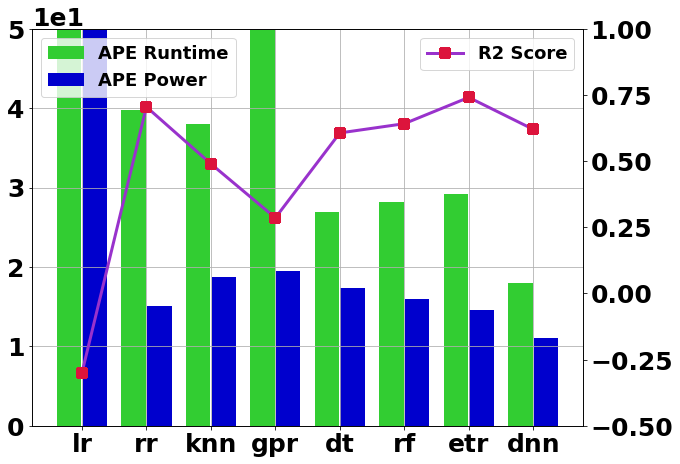

In [11]:
ls_temp = ['lr', 'rr', 'knn','gpr','dt','rf','etr','dnn']
ls = np.arange(0,8)
fig, ax = plt.subplots(1,1, figsize = (10, 7)) # create 2x2 array of subplots
y_r2 = r2_arm
y_mape_runtime = ape_runtime_arm
y_mape_power = ape_power_arm

bar1 = ax.bar(ls-0.2,y_mape_runtime, width = 0.38,color = 'limegreen', label = 'APE Runtime', align = 'center')
bar2 = ax.bar(ls+0.2,y_mape_power, width = 0.38, color = 'mediumblue', label = 'APE Power', align = 'center')
ax.legend(frameon= True, loc='upper left', prop={'size': 18})
# ax_temp.set_xticklabels(ls, rotation = 90)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylim(0,50)
ax.grid()

ax_temp = ax.twinx()  # instantiate a second axes that shares the same x-axis
px = ax_temp.plot(ls_temp, y_r2,marker = '+', color = 'darkorchid',label='R2 Score', linewidth = 3, markersize = 12, 
                  mec = 'crimson',mew = 10)
ax_temp.legend(frameon=True, loc='upper right', prop={'size': 18})
ax_temp.set_xticklabels(ls_temp, rotation = 90, fontsize = 25,fontweight = 'bold')
ax_temp.set_ylim(-0.5,1)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
name = 'transfer_learning_intel_to_xeon'
plt.rc('font', size = 25)
fig.savefig(name+ '.eps')
fig.show()
